In [ ]:
# Import necessary libraries
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For data visualization
# Import modules from scikit-learn
from sklearn.compose import ColumnTransformer # For preprocessing data by applying different transformers to different columns
from sklearn.pipeline import Pipeline # For chaining multiple transformers and an estimator in a single object
from sklearn.preprocessing import OneHotEncoder # For encoding categorical variables as numeric ones
from sklearn.metrics import r2_score,mean_absolute_error # For evaluating the performance of regression models using metrics like R-squared and mean absolute error
from sklearn.model_selection import train_test_split # For splitting a dataset into training and testing sets for machine learning models
from sklearn.linear_model import LinearRegression # Three popular regression models used for supervised learning
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

Import the dataset


In [ ]:
#import dataset from github raw 
url = 'https://raw.githubusercontent.com/Sanket1909/capstone-2/master/laptop_price.csv'
data = pd.read_csv(url,encoding='latin-1') # Read in data from csv file
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Drop unnecessary columns from the dataset
data.drop(columns=['laptop_ID','Product'],inplace=True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Check for missing values in the cleaned dataset
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [ ]:
# Clean up the 'Ram' and 'Weight' columns by removing unnecessary units
data['Ram']=data['Ram'].str.replace('GB','')# Remove 'GB' from the 'Ram' column
data['Weight']=data['Weight'].str.replace('kg','')# Remove 'kg' from the 'Weight' column
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


Text(0.5, 1.0, 'Laptop Counts by Company')

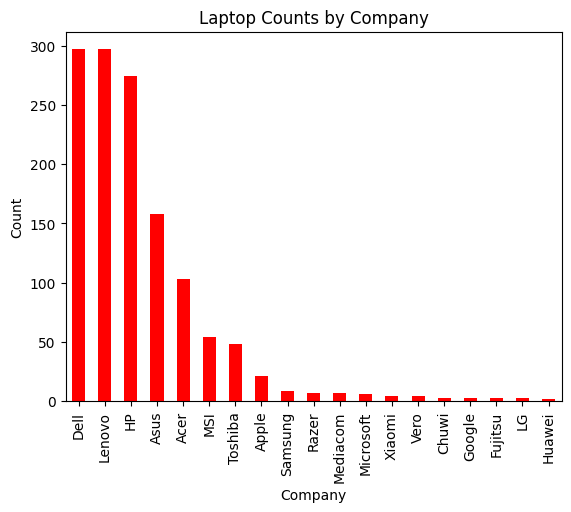

In [ ]:
# Create a bar plot of laptop counts by company
data['Company'].value_counts().plot(kind='bar',color='red')
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Laptop Counts by Company')

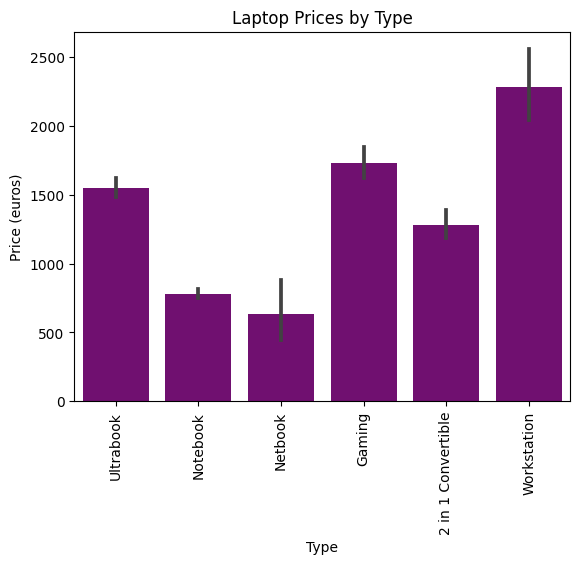

In [ ]:
sns.barplot(x=data['TypeName'], y=data['Price_euros'], color='purple')

# Add labels and title to the plot
plt.xlabel('Type')
plt.ylabel('Price (euros)')
plt.title('Laptop Prices by Type')
# Rotate x-axis tick labels for better readability
plt.xticks(rotation='vertical')
sns.set_palette('husl')
plt.show()


In [ ]:
# now ScreenResolution
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
# Create a new column 'TouchScreen' based on the presence of 'Touchscreen' in 'ScreenResolution'
data['TouchScreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0


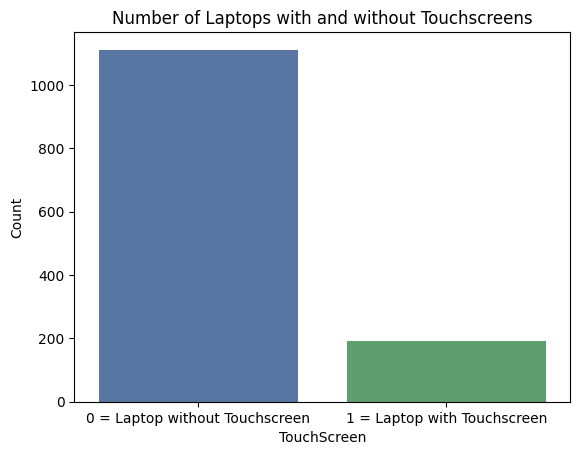

In [ ]:
colors = ['#4C72B0', '#55A868']
sns.barplot(x=['Laptop without Touchscreen', 'Laptop with Touchscreen'], 
            y=data['TouchScreen'].value_counts(), palette=colors)
plt.title('Number of Laptops with and without Touchscreens')
plt.ylabel('Count')
plt.xlabel('TouchScreen')
plt.xticks(ticks=[0, 1], labels=['0 = Laptop without Touchscreen', '1 = Laptop with Touchscreen'])
plt.show()

In [ ]:
# Create a new column named 'IPS'
# The value of this column will be based on whether the 'ScreenResolution' column contains the substring 'IPS'
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if'IPS' in x else 0)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


In [ ]:
#create 2 more column for resolution from ScreenResolution column
column=data['ScreenResolution'].str.split('x',n=1,expand=True)
data['X_res']=column[0]
data['Y_res']=column[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
#replace the strings in X_res column 
data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [ ]:
# now convert both X_res and y_res into an integer
data['X_res']=data['X_res'].astype('int')
data['Y_res']=data['Y_res'].astype('int')

In [ ]:
#create Pixel per inch with the help of X_res,Y_res and Inches columns
data['Pixel per inch'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,X_res,Y_res,Pixel per inch
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [ ]:
#now remove Inches,X_res,Y_res and ScreenResolution 
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [ ]:
#create more columns aCC. TO THE CATEGORY 
data['Cpu_Name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

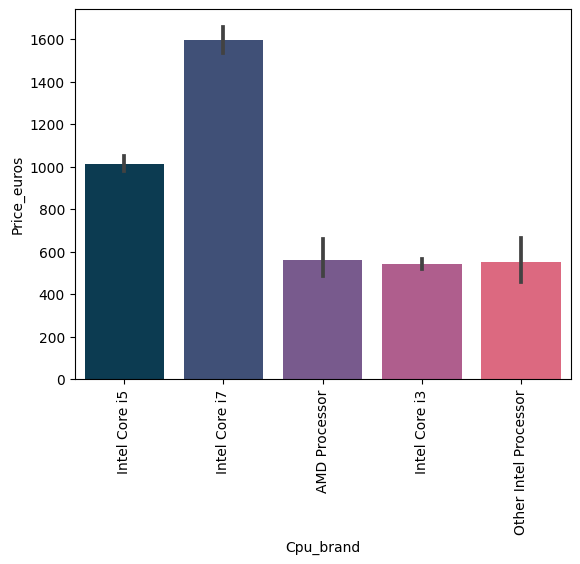

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Pixel per inch,Cpu_Name,Cpu_brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


In [ ]:
# Define a function to categorize processor types
def categorize_processor(text):
    if text in ['Intel Core i7', 'Intel Core i5', 'Intel Core i3']:
        return text
    elif text.startswith('Intel'):
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
data['Cpu_brand']=data['Cpu_Name'].apply(categorize_processor)


colors = ["#003f5c", "#374c80", "#7a5195", "#bc5090", "#ef5675", "#ff764a", "#ffa600"]
sns.barplot(x=data['Cpu_brand'], y=data['Price_euros'], palette=colors)
plt.xticks(rotation='vertical')
plt.show()
data.head()

In [ ]:
#now remove Cpu and Cpu_name 
data.drop(columns=['Cpu','Cpu_Name'],inplace=True)

In [ ]:
#Convert the 'Memory' column to a string and remove '.0' from the end of each string
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
#Replace 'GB' with an empty string and 'TB' with '000' in the 'Memory' column
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
#Split the 'Memory' column by '+' and create two column columns 'first' and 'second'
column = data["Memory"].str.split("+", n = 1, expand = True)
data["first"]= column[0]
#Strip any leading or trailing white space from the 'first' column
data["first"]=data["first"].str.strip()

data["second"]= column[1]
#Create binary columns for each type of storage in the 'first' column
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#Remove all non-digit characters from the 'first' and 'second' columns
data['first'] = data['first'].str.replace(r'\D', '')
#Replace any null values in the 'second' column with '0'
data["second"].fillna("0", inplace = True)

data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#Remove all non-digit characters from the 'first' and 'second' columns
data['second'] = data['second'].str.replace(r'\D', '')
#Convert the 'first' and 'second' columns to integers
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)
#Calculate the total amount of each type of storage by multiplying the binary columns by the corresponding 'first' and 'second' values
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])
#Drop the columns from the dataframe
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)



<ipython-input-20-f29dc31cb40f>:19: FutureWarning: The default value of regex will change from True to False in a future version.
  data['first'] = data['first'].str.replace(r'\D', '')
<ipython-input-20-f29dc31cb40f>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  data['second'] = data['second'].str.replace(r'\D', '')


In [ ]:
#drop Memory 
data.drop(columns=['Memory'],inplace=True)

In [ ]:
#drop hybrid and Flash_Storage
data.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [ ]:
#Create a new column 'Gpu brand' and extract the first word from the 'Gpu' column
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,TouchScreen,IPS,Pixel per inch,Cpu_brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
#filter out rows where the GPU brand is 'ARM'
data = data[data['Gpu brand'] != 'ARM']

In [ ]:
#drops the 'Gpu'
data.drop(columns=['Gpu'],inplace=True)

<ipython-input-25-dd1dea654130>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'],inplace=True)


In [ ]:
def categorize_os(os):
    if os in ['Windows 10', 'Windows 7', 'Windows 10 S']:
        return 'Windows'
    elif os in ['macOS', 'Mac OS X']:
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(categorize_os)

<ipython-input-26-ec909bc4b0d1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['os'] = data['OpSys'].apply(categorize_os)


<ipython-input-27-b60217e30951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace=True)


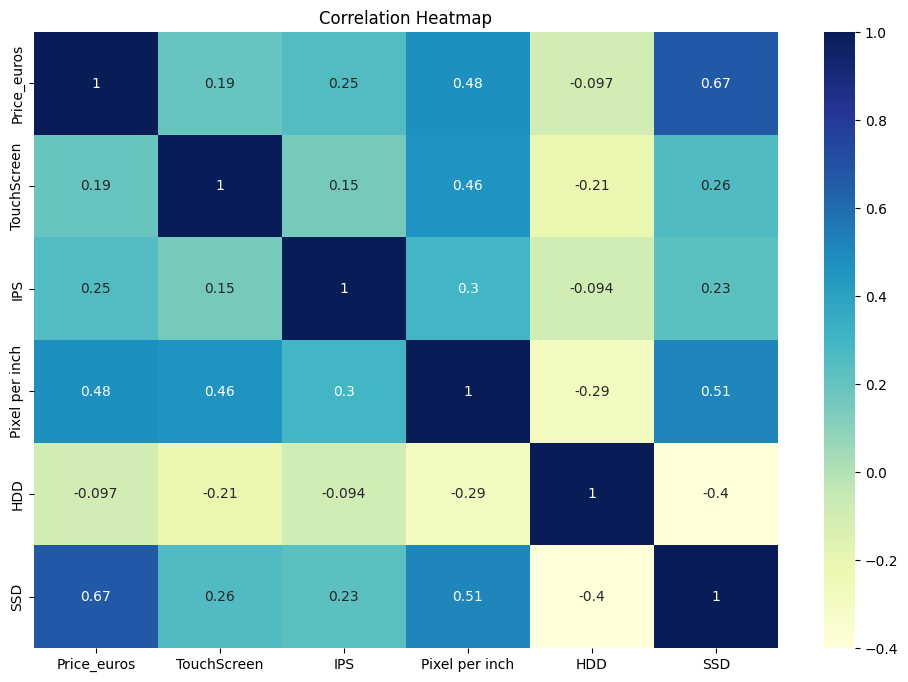

In [ ]:
# drop the columns OpSys
data.drop(columns=['OpSys'],inplace=True)
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data.drop(columns=['Price_euros'])
y = np.log(data['Price_euros'])

In [ ]:
#splitting the data into training and testing sets with a test size of 15% and a random state of 2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

LinearRegression

In [ ]:
#Preprocessing the data
preprocessor = ColumnTransformer(transformers=[
('onehot', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

#Define the model
model1 = LinearRegression()

#Creating a pipeline with preprocessor and model
pipeline = Pipeline([
('preprocessor', preprocessor),
('model', model1)
])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

#Train the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict the values of y using the testing data
y_pred = pipeline.predict(X_test)

#Evaluate the model's performance using R2 score and MAE
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8073277450155136
MAE: 0.21017827953019197


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
model2 = GradientBoostingRegressor()

#Creating a pipeline with preprocessor and model
pipeline = Pipeline([
('preprocessor', preprocessor),
('model', model2)
])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

#Train the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict the values of y using the testing data
y_pred = pipeline.predict(X_test)
#Evaluate the model's performance using R2 score and MAE
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8676444292120136
MAE: 0.17520650491436682


In [ ]:
# Random Forest
model3 = RandomForestRegressor()

#Creating a pipeline with preprocessor and model
pipeline = Pipeline([
('preprocessor', preprocessor),
('model', model3)
])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

#Train the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict the values of y using the testing data
y_pred = pipeline.predict(X_test)

#Evaluate the model's performance using R2 score and MAE
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8838073183829686
MAE: 0.15612314867237237


In [ ]:
model4 = XGBRegressor()

#Creating a pipeline with preprocessor and model
pipeline = Pipeline([
('preprocessor', preprocessor),
('model', model4)
])

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

#Train the pipeline on the training data
pipeline.fit(X_train, y_train)

#Predict the values of y using the testing data
y_pred = pipeline.predict(X_test)

#Evaluate the model's performance using R2 score and MAE
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score: 0.8838438898359853
MAE: 0.15932872621761532


In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!jupyter nbconvert --to html Capstone2(group11).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html Capstone2(group11).ipynb'


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g